In [16]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 19 22:49:51 2024

@author: jha91
"""

## Parameter initialization (clear all)
from IPython import get_ipython
get_ipython().magic('reset -sf')

Dir1 = r'C:\Users\jha91\OneDrive - Georgia Institute of Technology\Year1 2024 Spring\BMED 6517 ML Bio\Group project\Data\Consolidated_Features'
# Dir1 = r'C:\Users\Jisoo Ha\OneDrive - Georgia Institute of Technology\Year1 2024 Spring\BMED 6517 ML Bio\Group project\Data\Consolidated_Features'
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io as sio
from scipy import stats
from scipy.signal import butter, filtfilt, resample 

C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\2408577872.py:10: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


# Load data

In [17]:
Subject = os.listdir(Dir1) # Post_MI: 28, Healthy: 9
NumSub = np.size(Subject)
subj_list = [
    "3128", "3129", "3130", "3131", "3132", "3133", "3136", "3137", "3138", "3139", 
    "3140", "3141", "3142", "3143", "3147", "3148", "3149", "3150", "3151", "3152", 
    "3153", "3154", "3155", "3156", "3158", "3159", "3160", "3162", "6037", "6038", 
    "6043", "6044", "6045", "6046", "6047", "6048", "6049"]
NumStim = 5
Stimulus = ['Rest', 'Reading', 'SpeechPrep', 'Speech', 'Recovery'] # rest vs. speechprep -> stim0 vs. stim2
NumFeat = 5
Feature = ['HR', 'PAT', 'PEP', 'PPGamp', 'PTTrecip']
# 1st column: time, second column: feature values
Subj = np.zeros(len(Subject))
for i in range(len(Subject)):
    Subj[i] = int(Subject[i][3:])  
Subj.sort()

In [18]:
dataframes_MI = []
dataframes_Ht = []
dataframes_all = []
sub_MI = -1;
sub_Ht = -1;
sub_all = -1;
for sub in range(NumSub):
    if str(round(Subj[sub])) in subj_list:
        if str(Subj[sub]).startswith('3'):
            sub_MI = sub_MI+1;
            dataframes_MI.append([]) 
            for stim in range(NumStim):
                dataframes_MI[sub_MI].append([]) 
                for feat in range(NumFeat):
                    dataframes_MI[sub_MI][stim].append([]) 
                    Feat_load = os.path.join(Dir1, 'sub' + str(int(Subj[sub])), 'stim' + str(stim) + '_' + Feature[feat] + '.csv');
                    data = pd.read_csv(Feat_load)
                    dataframes_MI[sub_MI][stim][feat] = data.values
                    # dataframes_MI[sub_Ht][stim][feat].append(np.zeros(len(data.values[:,2])))
        if str(Subj[sub]).startswith('6'):
            sub_Ht = sub_Ht+1;
            dataframes_Ht.append([])
            for stim in range(NumStim):
                dataframes_Ht[sub_Ht].append([])
                for feat in range(NumFeat):
                    dataframes_Ht[sub_Ht][stim].append([])
                    Feat_load = os.path.join(Dir1, 'sub' + str(int(Subj[sub])), 'stim' + str(stim) + '_' + Feature[feat] + '.csv');
                    data = pd.read_csv(Feat_load)
                    dataframes_Ht[sub_Ht][stim][feat] = data.values
                    # dataframes_Ht[sub_Ht][stim][feat].append(np.zeros(len(data.values[:,2])))
for sub in range(NumSub):
    if str(round(Subj[sub])) in subj_list:
        sub_all = sub_all+1;
        dataframes_all.append([]) 
        for stim in range(NumStim):
            dataframes_all[sub_all].append([]) 
            for feat in range(NumFeat):
                dataframes_all[sub_all][stim].append([]) 
                Feat_load = os.path.join(Dir1, 'sub' + str(int(Subj[sub])), 'stim' + str(stim) + '_' + Feature[feat] + '.csv');
                data = pd.read_csv(Feat_load)
                dataframes_all[sub_all][stim][feat] = data.values

# Visualization - Pairplot

c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\py

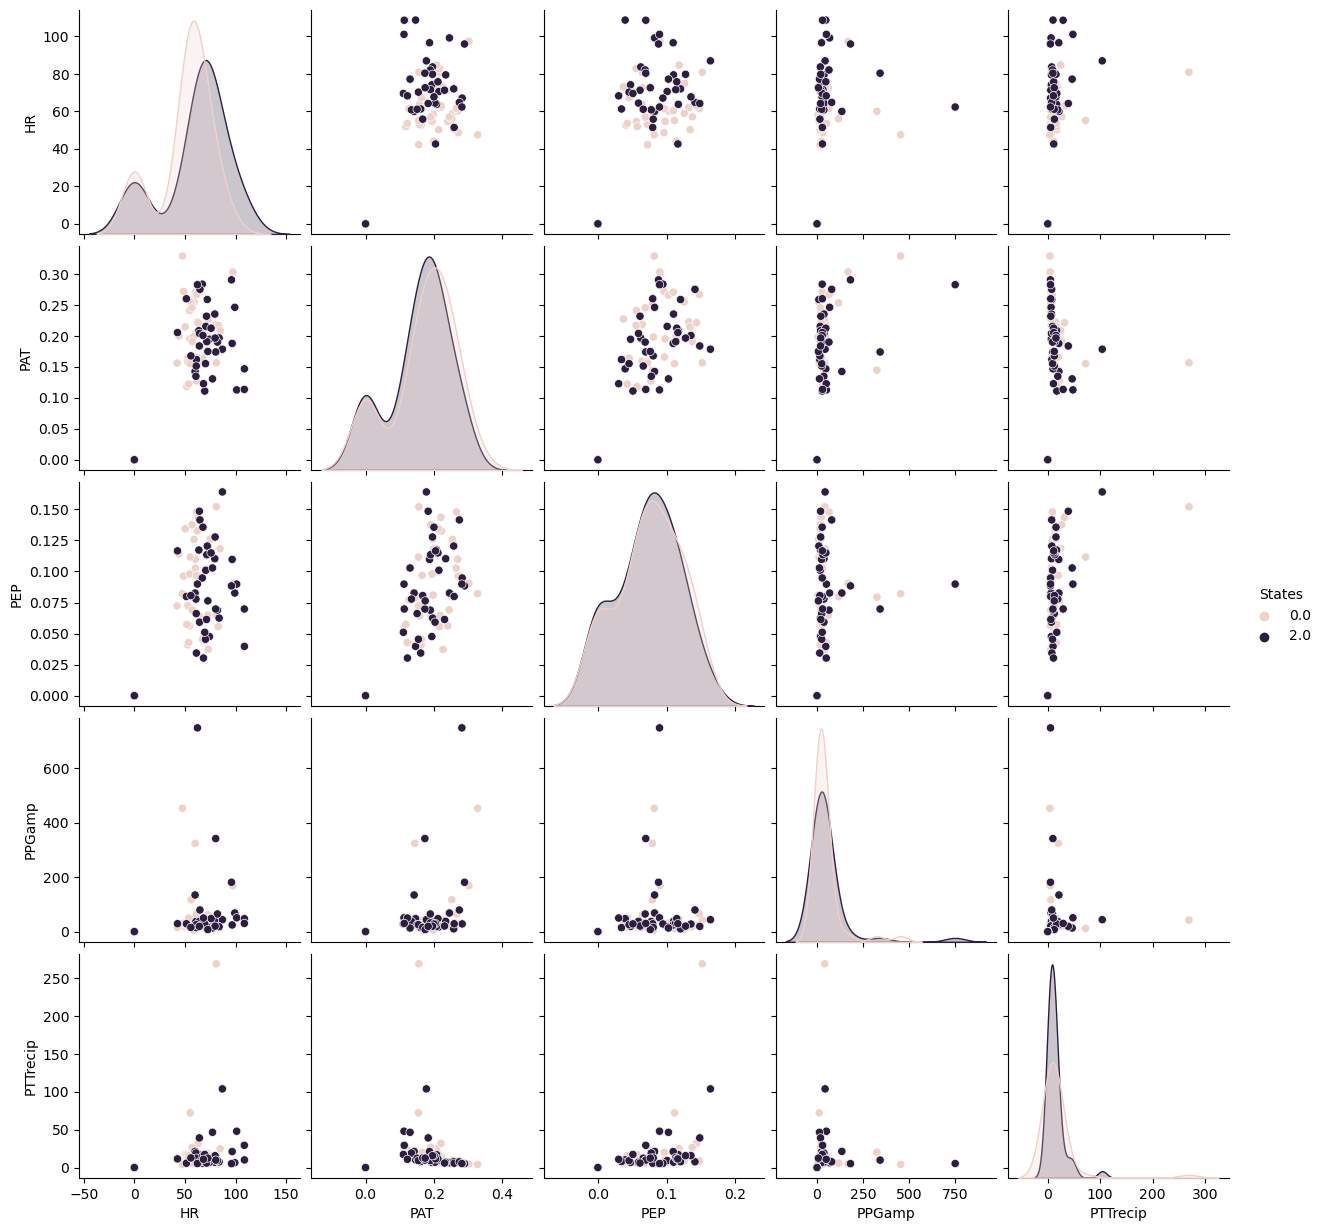

In [19]:
# %% Data visualize - pairplot using seaborn
# % All

NumSub_all = len(dataframes_all)
feat_values = np.zeros((NumSub, NumFeat)) #np.zeros((NumSub_MI,1))
feat_values_total = []
y_val_total = []
all_feat_avg_total = []

for stim in range(NumStim):
    for feat in range(NumFeat):
        for sub in range(NumSub_all):
            feat_values[sub, feat] = np.mean(dataframes_all[sub][stim][feat][:,1])
        y_val = np.ones(len(feat_values))*stim
        if len(feat_values_total) < NumSub_all:
            feat_values_total = feat_values[:, feat:feat+1]
        else:
            feat_values_total = np.concatenate((feat_values_total, feat_values[:, feat:feat+1]), axis = 1)
    y_val_total = np.concatenate((y_val_total, y_val))
    if len(all_feat_avg_total) < NumSub_all:
        all_feat_avg_total = feat_values_total
    else:
        all_feat_avg_total = np.concatenate((all_feat_avg_total, feat_values_total))
    feat_values_total = []

# Make it into pandas form

# Sort states: rest (0) & stress (2)
target_values = [0, 2]

# Use list comprehension to get the indices of elements with target values
indices = [i for i, value in enumerate(y_val_total) if value in target_values]
y_val_total_1 = y_val_total[indices]
all_feat_avg_total_1 = all_feat_avg_total[indices,:]
  
# dictionary of lists 
dict = {'States': y_val_total_1, Feature[0]: all_feat_avg_total_1[:,0], 
        Feature[1]: all_feat_avg_total_1[:,1],
        Feature[2]: all_feat_avg_total_1[:,2],
        Feature[3]: all_feat_avg_total_1[:,3],
        Feature[4]: all_feat_avg_total_1[:,4]} 
    
df_all = pd.DataFrame(dict) 
# print(df)
sns.pairplot(df_all, hue="States")

# Normalization

In [20]:
# %% Baseline correction (normalization)
mean_all = []
data_all = []
data_y_all = []
num_data = 80
dp = round(num_data/2)

for subj in range(len(subj_list)):
    data_all.append([]) 
    data_y_all.append([]) 
    for stim in range(2):
        data_all[subj].append([]) 
        data_y_all[subj].append([]) 
        for feat in range(NumFeat):
            data_all[subj][stim].append([]) 
            data_y_all[subj][stim].append([]) 
            # sort 200 points each for state 0 (baseline) and state 2 (feature)
            baseline = dataframes_all[subj][0][feat][:, 1]
            baseline_mid = baseline[round(len(baseline)/2)-dp:round(len(baseline)/2)+dp] 
            feature = dataframes_all[subj][2][feat][:, 1]
            feature_mid = feature[round(len(feature)/2)-dp:round(len(feature)/2)+dp]
            mean_all.append((np.mean(feature_mid) - np.mean(baseline_mid))/np.mean(baseline_mid))
            if stim == 0:
                # data_all[subj][stim][feat] = baseline_mid
                data_all[subj][stim][feat] = (baseline_mid - np.mean(baseline_mid))/np.mean(baseline_mid)
                data_y_all[subj][stim][feat] = np.zeros([len(data_all[subj][stim][feat]),1])
            if stim == 1:
                # data_all[subj][stim][feat] = feature_mid
                data_all[subj][stim][feat] = (feature_mid - np.mean(baseline_mid))/np.mean(baseline_mid)
                data_y_all[subj][stim][feat] = np.ones([len(data_all[subj][stim][feat]),1])

# Reshape Data matrix

In [21]:
# reshape [subj][stim][feat] -> [stim][feat][:]
data_all_1 = []
data_y_all_1 = []

for feat in range(NumFeat):
    temp_data_stim = []
    temp_labels_stim = []
    for stim in range(2):
        temp_data = []
        temp_labels = []
        for subj in range(len(subj_list)):
            temp_data.extend(data_all[subj][stim][feat])
            temp_labels.extend(data_y_all[subj][stim][feat])
        temp_data_stim.extend(temp_data)
        temp_labels_stim.extend(temp_labels)
    data_all_1.append(temp_data_stim)
    data_y_all_1.append(temp_labels_stim)

# %% list into array

min_length = min(len(lst) for lst in data_all_1) # Ensure all lists have the same length (2480)
data_all_1_truncated = [lst[:min_length] for lst in data_all_1]
data_all_1_array = np.array(data_all_1_truncated) # Convert the truncated list to a numpy array
data_all_1_array = data_all_1_array.reshape(-1, 5) # Reshape the array to have 5 columns
# print(data_all_1_array.shape) 

# same for y
min_length_y = min(len(lst) for lst in data_y_all_1)
data_y_all_1_truncated = [lst[:min_length_y] for lst in data_y_all_1]
data_y_all_1_array = np.array(data_y_all_1_truncated)
data_y_all_1_array = data_y_all_1_array.reshape(-1, 5)

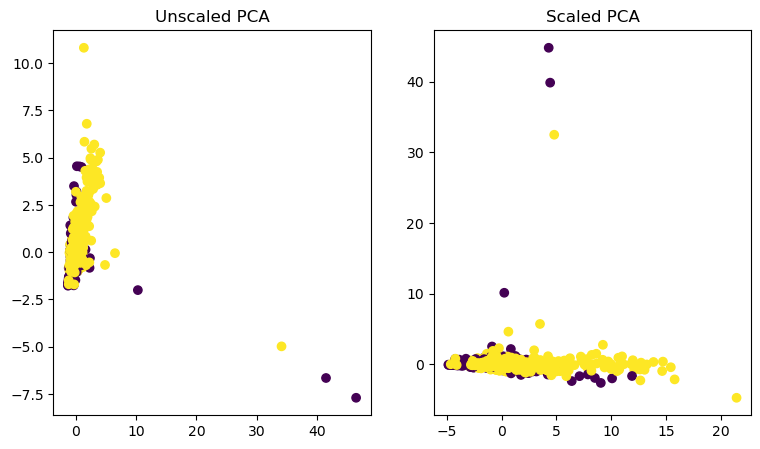

In [22]:
# %% PCA example

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# feats, labels = load_wine(return_X_y=True)
feats = data_all_1_array[:,:]
X = feats
labels = data_y_all_1_array[:,0]
y = labels

feats_upc = PCA(n_components=2).fit_transform(feats)
feats_spc = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(feats))

fig, axes = plt.subplots(1, 2, figsize=(9, 5))
axes[0].scatter(feats_upc[:, 0], feats_upc[:, 1], c=labels)
axes[0].set_title('Unscaled PCA')
axes[1].scatter(feats_spc[:, 0], feats_spc[:, 1], c=labels)
axes[1].set_title('Scaled PCA')
plt.show()


# Outlier Removal

C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\4180702389.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', n_labels)  # You can choose your colormap


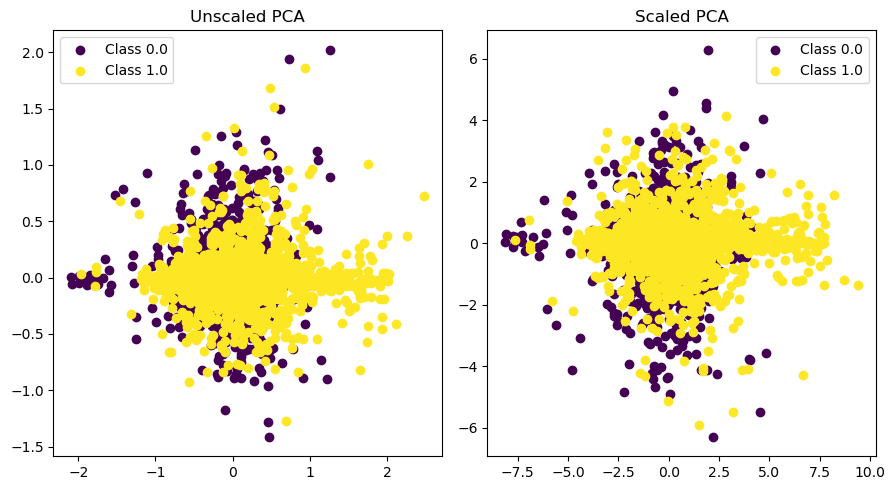

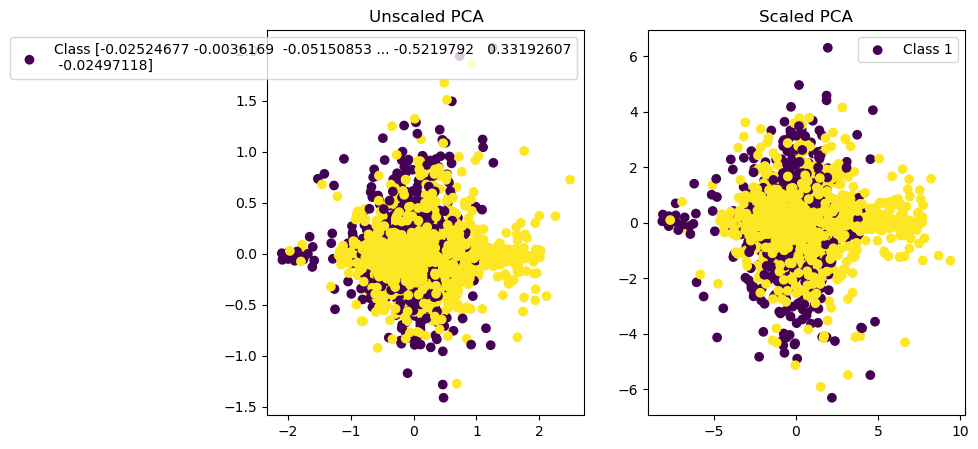

In [23]:
# %% Outlier removed version from upper code

feats = X
labels = y
k=5

# Calculate z-scores for each feature
z_scores = np.abs((feats - np.mean(feats, axis=0)) / np.std(feats, axis=0))

# Define a threshold for z-score to identify outliers
threshold = 3

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Remove outliers
feats_cleaned = np.delete(feats, outlier_indices[0], axis=0)
labels_cleaned = np.delete(labels, outlier_indices[0])

feats_upc = PCA(n_components=5).fit_transform(feats_cleaned)
feats_spc = PCA(n_components=5).fit_transform(StandardScaler().fit_transform(feats_cleaned))


# Create a colormap based on the number of unique labels
unique_labels = np.unique(labels_cleaned)
n_labels = len(unique_labels)
colormap = plt.cm.get_cmap('viridis', n_labels)  # You can choose your colormap

fig, axes = plt.subplots(1, 2, figsize=(9, 5))

# Create scatter plots and build a legend
for i, label in enumerate(unique_labels):
    # Find the points corresponding to the current label
    idx = labels_cleaned == label
    axes[0].scatter(feats_upc[idx, 0], feats_upc[idx, 1], color=colormap(i), label=f'Class {label}')
    axes[1].scatter(feats_spc[idx, 0], feats_spc[idx, 1], color=colormap(i), label=f'Class {label}')

axes[0].set_title('Unscaled PCA')
axes[1].set_title('Scaled PCA')

# Add a legend outside of the plot area
axes[0].legend() 
axes[1].legend() 

# axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

plt.show()
# _____________________

fig, axes = plt.subplots(1, 2, figsize=(9, 5))
axes[0].scatter(feats_upc[:, 0], feats_upc[:, 1], c=labels_cleaned, label=f'Class {feats_upc[:, 0]}')
axes[0].set_title('Unscaled PCA')
axes[0].legend() 
axes[1].scatter(feats_spc[:, 0], feats_spc[:, 1], c=labels_cleaned, label=f'Class {1}')
axes[1].set_title('Scaled PCA')
axes[1].legend() 
plt.show()

# Sparse PCA

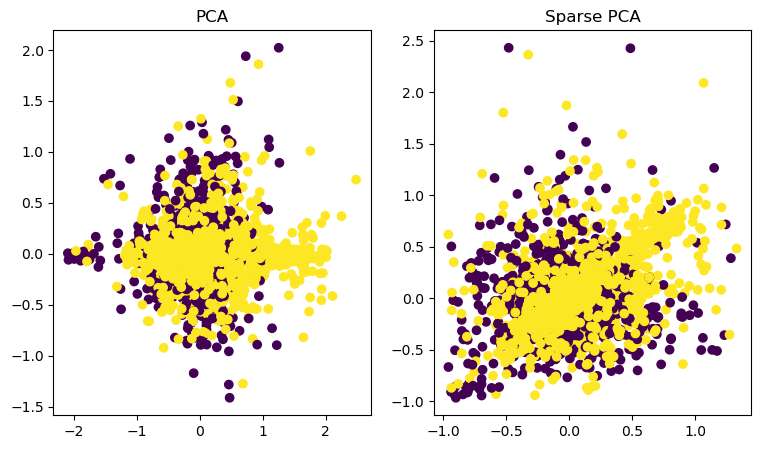

In [24]:
# %% PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import SparsePCA, KernelPCA
from sklearn.decomposition import PCA

k=5
X = feats_cleaned
y = labels_cleaned

lPCA = PCA(n_components=k)
lPCA.fit(X)
X_PCA = lPCA.transform(X)

sPCA = SparsePCA(n_components=k)
sPCA.fit(X)
X_sPCA = sPCA.transform(X)

kPCA = KernelPCA(n_components=k, kernel='rbf', gamma=15, fit_inverse_transform=True)
kPCA.fit(X)
X_kPCA = kPCA.transform(X)

# lda = LinearDiscriminantAnalysis(n_components=k)
# lda.fit(X,y)
# X_lda = lda.transform(X)

# lda = LinearDiscriminantAnalysis(n_components=k)
# lda.fit(X,y)
# X_lda = lda.transform(X)

# fig, axes = plt.subplots(1,3,figsize=(9,8))
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].scatter(X_PCA[:,0], X_PCA[:,1],c=y)
axes[0].set_title('PCA')

axes[1].scatter(X_sPCA[:,0], X_sPCA[:,1],c=y)
axes[1].set_title('Sparse PCA')

# axes[2].scatter(X_lda[:,0], X_lda[:,1],c=y)
# axes[2].set_title('LDA')

# axes[2].scatter(X_kPCA[:,0], np.zeros(X_kPCA[:,1].size), c=y)
# axes[2].set_title('Kernel PCA')

# axes[2].scatter(X_lda[:,0], X_lda[:,1],c=y)
# axes[2].set_title('LDA')

plt.show()

# tSNE

In [25]:
# %% TSNE 
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, perplexity=20.0,
#             early_exaggeration=12.0,
#             learning_rate=200.0,
#             n_iter=1000,
#             init='random')

# X_tsne = tsne.fit_transform(feats)

# fig, ax = plt.subplots()
# ax.scatter(X_tsne[:,0], X_tsne[:,1], c=y)
# ax.set_title('TSNE')

# Pairplot

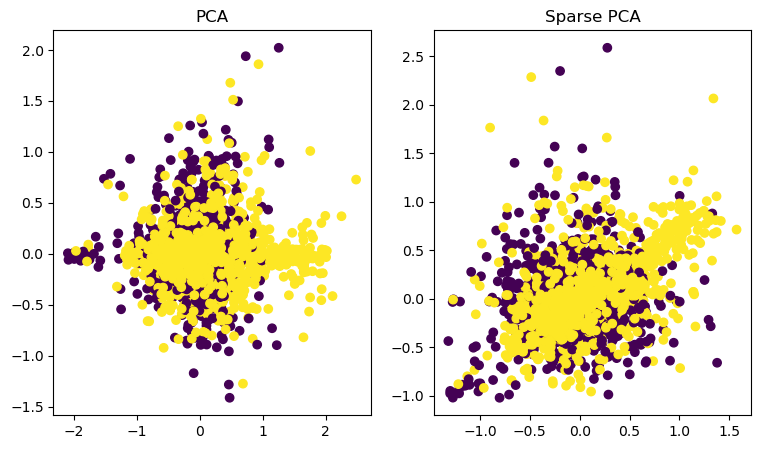

C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\2007759150.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(y)))  # Adjust the number of colors as needed
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\

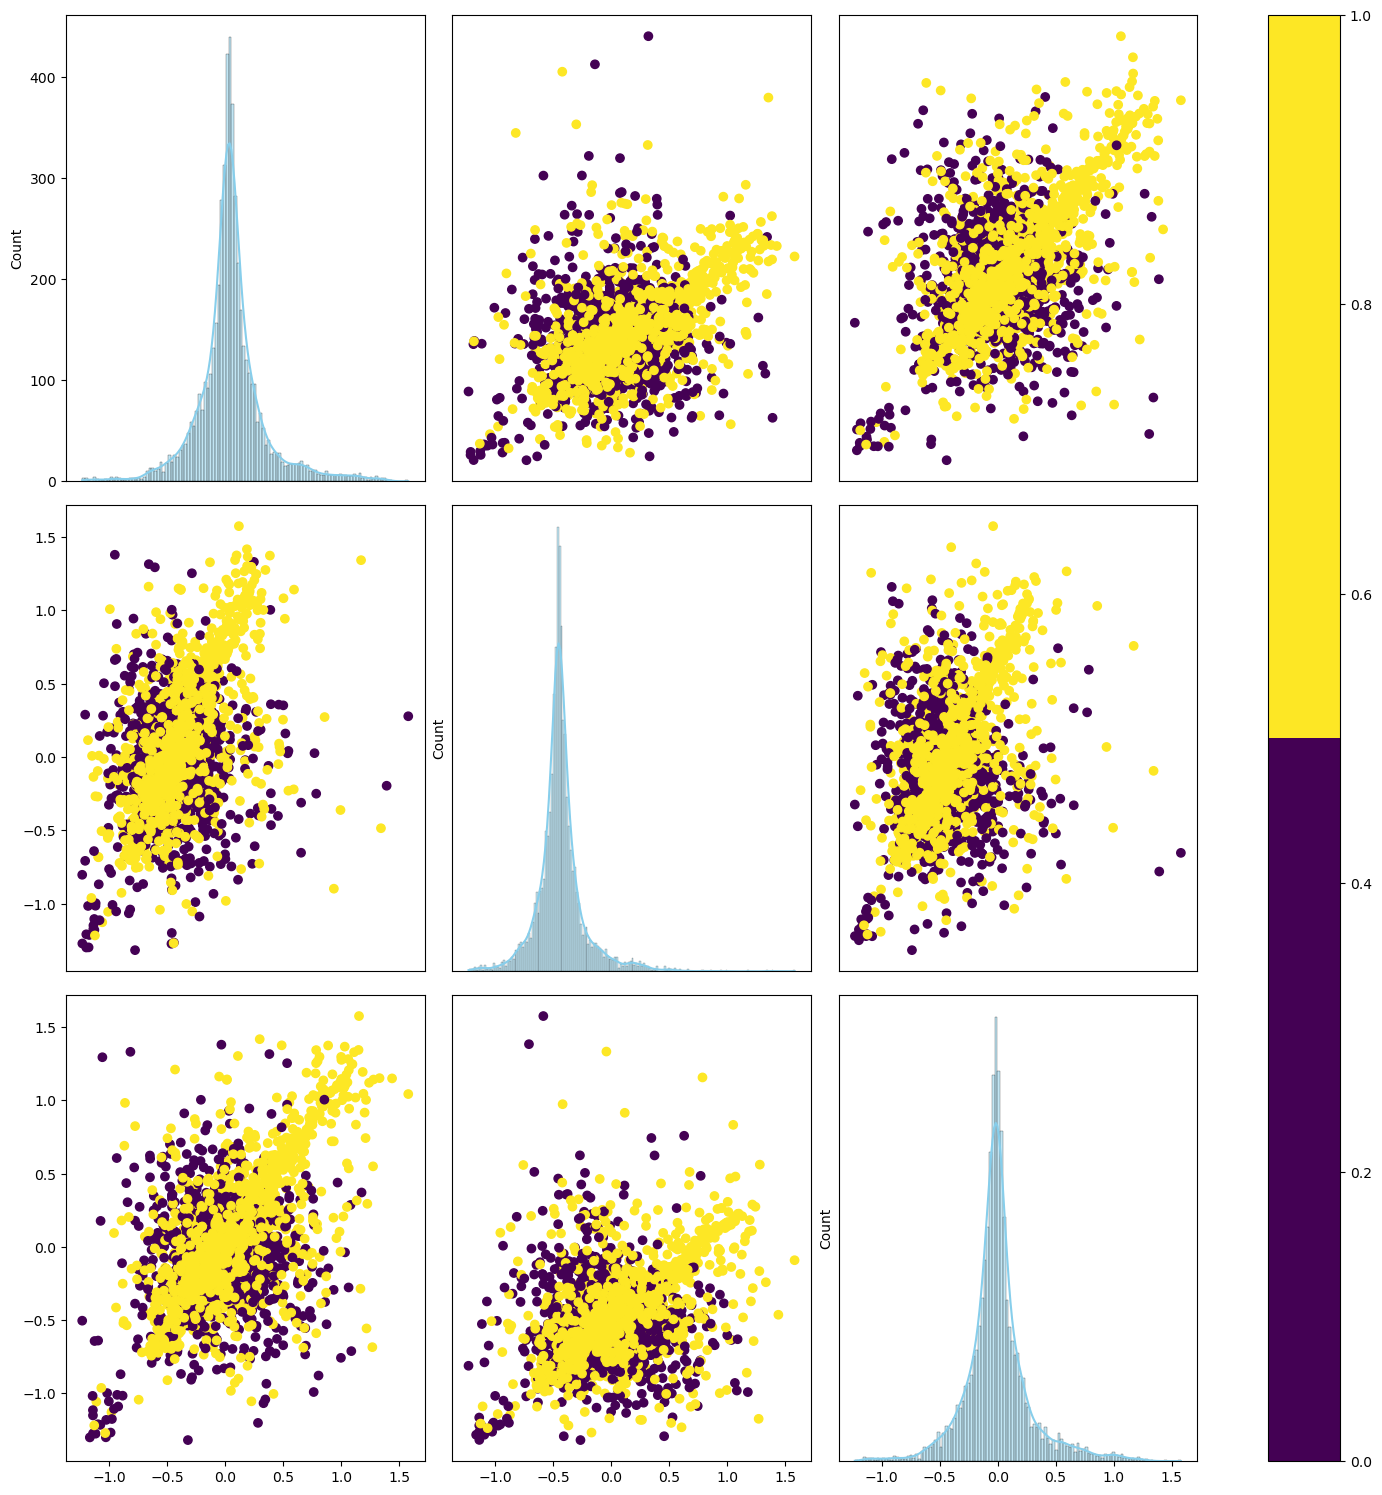

In [26]:
# %% PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import SparsePCA, KernelPCA
from sklearn.decomposition import PCA

k = 3
X = feats_cleaned
y = labels_cleaned

lPCA = PCA(n_components=k)
lPCA.fit(X)
X_PCA = lPCA.transform(X)

sPCA = SparsePCA(n_components=k)
sPCA.fit(X)
X_sPCA = sPCA.transform(X)

kPCA = KernelPCA(n_components=k, kernel='rbf', gamma=15, fit_inverse_transform=True)
kPCA.fit(X)
X_kPCA = kPCA.transform(X)

# lda = LinearDiscriminantAnalysis(n_components=k)
# lda.fit(X,y)
# X_lda = lda.transform(X)

# lda = LinearDiscriminantAnalysis(n_components=k)
# lda.fit(X,y)
# X_lda = lda.transform(X)

# fig, axes = plt.subplots(1,3,figsize=(9,8))
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].scatter(X_PCA[:,0], X_PCA[:,1],c=y)
axes[0].set_title('PCA')
# axes[0].legend() 

axes[1].scatter(X_sPCA[:,0], X_sPCA[:,1],c=y)
axes[1].set_title('Sparse PCA')
# axes[1].legend() 

# axes[2].scatter(X_lda[:,0], X_lda[:,1],c=y)
# axes[2].set_title('LDA')

# axes[2].scatter(X_kPCA[:,0], np.zeros(X_kPCA[:,1].size), c=y)
# axes[2].set_title('Kernel PCA')

# axes[2].scatter(X_lda[:,0], X_lda[:,1],c=y)
# axes[2].set_title('LDA')

plt.show()

# __________________________________ Pairplot
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_sPCA is your dataset after Sparse PCA transformation and y is your labels
n_features = k  # Number of features

# Create a figure with subplots in a 5x5 grid
fig, axes = plt.subplots(n_features, n_features, figsize=(15,15))  # Adjust figsize accordingly

# Create a color map
colormap = plt.cm.get_cmap('viridis', len(np.unique(y)))  # Adjust the number of colors as needed

# Iterate over all combinations of features
for i in range(n_features):
    for j in range(n_features):
        # Diagonal elements can be histograms or kdeplots
        if i == j:
            sns.histplot(X_sPCA[:,i], ax=axes[i, j], color='skyblue', kde=True)
        else:
            # Off-diagonal elements are scatter plots
            scatter = axes[i, j].scatter(X_sPCA[:,i], X_sPCA[:,j], c=y, cmap=colormap)

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        if i < n_features - 1:
            axes[i, j].set_xticks([])
        if j > 0:
            axes[i, j].set_yticks([])

# Adjust the layout
plt.tight_layout()

# Add a color bar
plt.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical')

# Show the plot
plt.show()

# K-means clustering

Cluster Centers:
 [[ 0.46154187  0.35189248  0.39243339]
 [-0.06810128 -0.05192233 -0.05790421]]

Labels:
 [1 1 1 ... 1 1 1]


C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\1456444370.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')


Silhouette Score for KMeans Clustering: 0.5131704488670623


c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


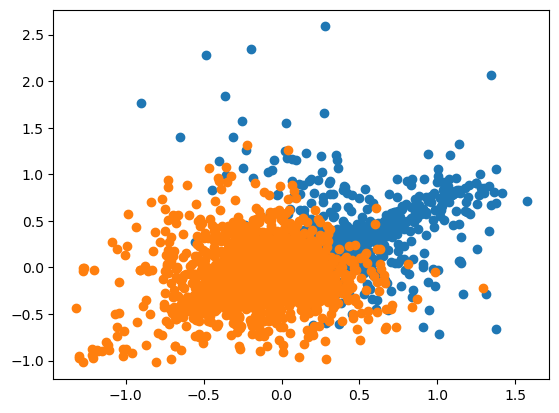

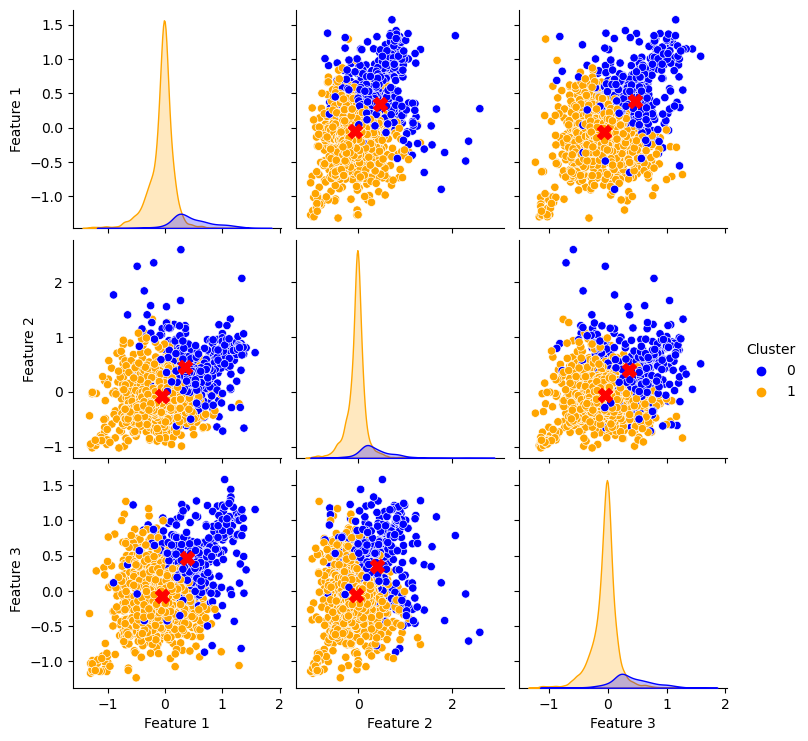

In [33]:
# %% K-means clustering

from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 2

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
# kmeans.fit(data_all_1_array)
kmeans.fit(X_sPCA)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


# Print cluster centers and labels
print("Cluster Centers:\n", cluster_centers)
print("\nLabels:\n", labels)

import matplotlib.pyplot as plt

# # Plotting cluster centers
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='x', label='Cluster Centers')

# # Plotting data points with labels
for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_sPCA, labels)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('KMeans Clustering Result - sPCA')
# # plt.legend()
# plt.show()

# __________________________________ Pairplot
# Assuming 'labels' is the array of cluster labels from kmeans.labels_
# Assuming 'X_sPCA' is the dataset you've performed PCA on

# Custom color palette
custom_palette = ['blue', 'orange']  # Add more colors if you have more than two clusters

# Create a dataframe for pair plotting
df_sPCA = pd.DataFrame(X_sPCA, columns=[f'Feature {i+1}' for i in range(X_sPCA.shape[1])])
df_sPCA['Cluster'] = labels  # Add the cluster labels as a column in the dataframe

# Create the pair plot using the custom color palette
pair_plot = sns.pairplot(df_sPCA, hue='Cluster', palette=custom_palette)

# To plot the cluster centers, we iterate over the subplots and add them to each
for i in range(pair_plot.axes.shape[0]):
    for j in range(pair_plot.axes.shape[1]):
        if i != j:
            pair_plot.axes[i, j].scatter(cluster_centers[:, i], cluster_centers[:, j], 
                                         s=100, c='red', marker='X', label='Cluster Centers' if (i == 0 and j == 1) else "")

# Adjust the legend location
# pair_plot._legend.set_bbox_to_anchor((1.05, 1))

# Show the plot
plt.show()

# Result comparision & Accuracy

- The Calinski-Harabasz index (also known as the variance ratio criterion) measures the ratio of dispersion between and within clusters. A higher Calinski-Harabasz score indicates better-defined clusters.
- The silhouette score can help identify individual points that are not well-clustered, or an average/max silhouette score can be used to evaluate the quality of the entire clustering model.
    - Ranges from -1 to 1. 1 meaning perfect separability.
Works best for dense, well-separated clusters

Accuracy: 0.36658448700929264
Silhouette Score for KMeans Clustering: 0.5131704488670623
Calinski-Harabasz Index for KMeans Clustering: 2210.7109390835517


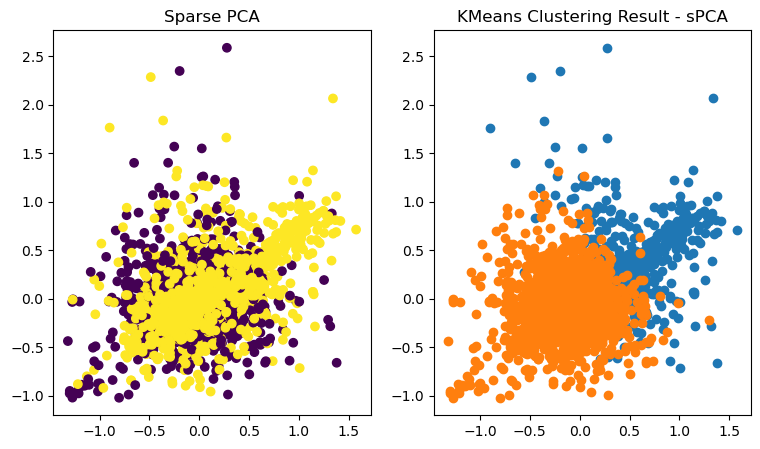

In [35]:
# ####### subplots
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].scatter(X_sPCA[:,0], X_sPCA[:,1],c=y)
axes[0].set_title('Sparse PCA')
# axes[0].legend() 

for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
axes[1].set_title('KMeans Clustering Result - sPCA')
# axes[1].legend() 

## check whether the label matches well
# X_sPCA[:,0&1] - y vs. cluster_points[:,0&1] -  -> match it with labels_cleaned (5273,)

labels_kmeans = labels
labels_real = np.round(labels_cleaned).astype(int)
# for i in range(labels_real):
#     labels

# Comparing each label and outputting 1 if they are the same, 0 otherwise
comparison_results = [1 if kmeans_label == real_label else 0 for kmeans_label, real_label in zip(labels_kmeans, labels_real)]

# print("Comparison results:", comparison_results)
Acc = np.mean(comparison_results)
print("Accuracy:", Acc)  # it is unsupervised method - so one cluster can match with any of the two clusters - accuracy can be reversed - (1-Acc)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_sPCA, labels)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_sPCA, labels)
print(f"Calinski-Harabasz Index for KMeans Clustering: {ch_score}")


# Spectral Clustering


Labels:
 [0 0 0 ... 0 0 0]


C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\1424037489.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

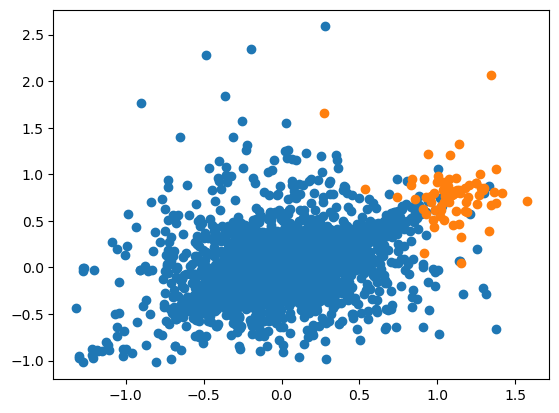

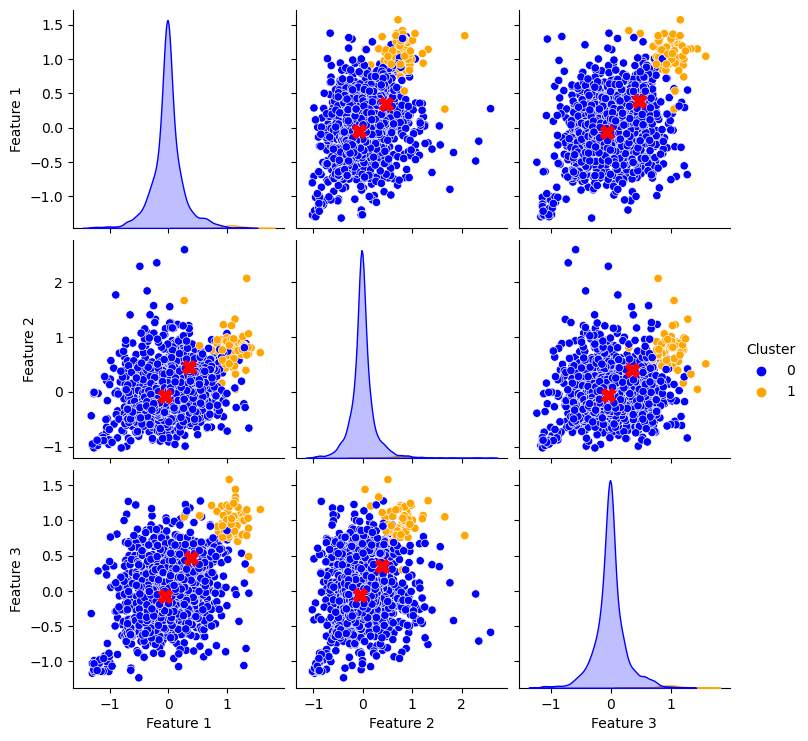

In [36]:
# %% Spectral clustering

from sklearn.cluster import SpectralClustering

# Define the number of clusters
num_clusters = 2

# Initialize KMeans model
kmeans = SpectralClustering(n_clusters=num_clusters)

# Fit the KMeans model to the data
# kmeans.fit(data_all_1_array)
kmeans.fit(X_sPCA)

labels = kmeans.labels_
n_features = kmeans.n_features_in_


# Print cluster centers and labels
print("\nLabels:\n", labels)

import matplotlib.pyplot as plt

# # Plotting cluster centers
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='x', label='Cluster Centers')

# # Plotting data points with labels
for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('KMeans Clustering Result - sPCA')
# # plt.legend()
# plt.show()

# __________________________________ Pairplot
# Assuming 'labels' is the array of cluster labels from kmeans.labels_
# Assuming 'X_sPCA' is the dataset you've performed PCA on

# Custom color palette
custom_palette = ['blue', 'orange']  # Add more colors if you have more than two clusters

# Create a dataframe for pair plotting
df_sPCA = pd.DataFrame(X_sPCA, columns=[f'Feature {i+1}' for i in range(X_sPCA.shape[1])])
df_sPCA['Cluster'] = labels  # Add the cluster labels as a column in the dataframe

# Create the pair plot using the custom color palette
pair_plot = sns.pairplot(df_sPCA, hue='Cluster', palette=custom_palette)

# To plot the cluster centers, we iterate over the subplots and add them to each
for i in range(pair_plot.axes.shape[0]):
    for j in range(pair_plot.axes.shape[1]):
        if i != j:
            pair_plot.axes[i, j].scatter(cluster_centers[:, i], cluster_centers[:, j], 
                                         s=100, c='red', marker='X', label='Cluster Centers' if (i == 0 and j == 1) else "")

# Adjust the legend location
# pair_plot._legend.set_bbox_to_anchor((1.05, 1))

# Show the plot
plt.show()

Accuracy: 0.5662810544282192
Silhouette Score for KMeans Clustering: 0.689814751054051
Calinski-Harabasz Index for KMeans Clustering: 1009.1452592821583


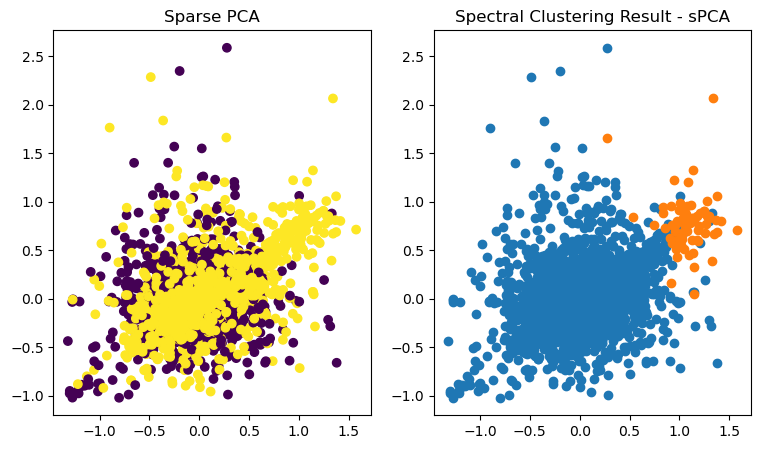

In [39]:
# ####### subplots
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].scatter(X_sPCA[:,0], X_sPCA[:,1],c=y)
axes[0].set_title('Sparse PCA')
# axes[0].legend() 

for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
axes[1].set_title('Spectral Clustering Result - sPCA')
# axes[1].legend() 

## check whether the label matches well
# X_sPCA[:,0&1] - y vs. cluster_points[:,0&1] -  -> match it with labels_cleaned (5273,)

labels_kmeans = labels
labels_real = np.round(labels_cleaned).astype(int)
# for i in range(labels_real):
#     labels

# Comparing each label and outputting 1 if they are the same, 0 otherwise
comparison_results = [1 if kmeans_label == real_label else 0 for kmeans_label, real_label in zip(labels_kmeans, labels_real)]

# print("Comparison results:", comparison_results)
Acc = np.mean(comparison_results)
print("Accuracy:", Acc)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_sPCA, labels)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_sPCA, labels)
print(f"Calinski-Harabasz Index for KMeans Clustering: {ch_score}")


# GMM


Labels:
 [0 0 0 ... 0 1 1]


C:\Users\jha91\AppData\Local\Temp\ipykernel_43528\1914585845.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jha91\AppData\Local\anaconda3\envs\pytest1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

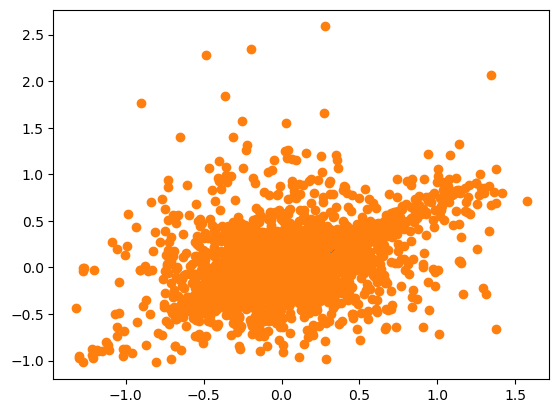

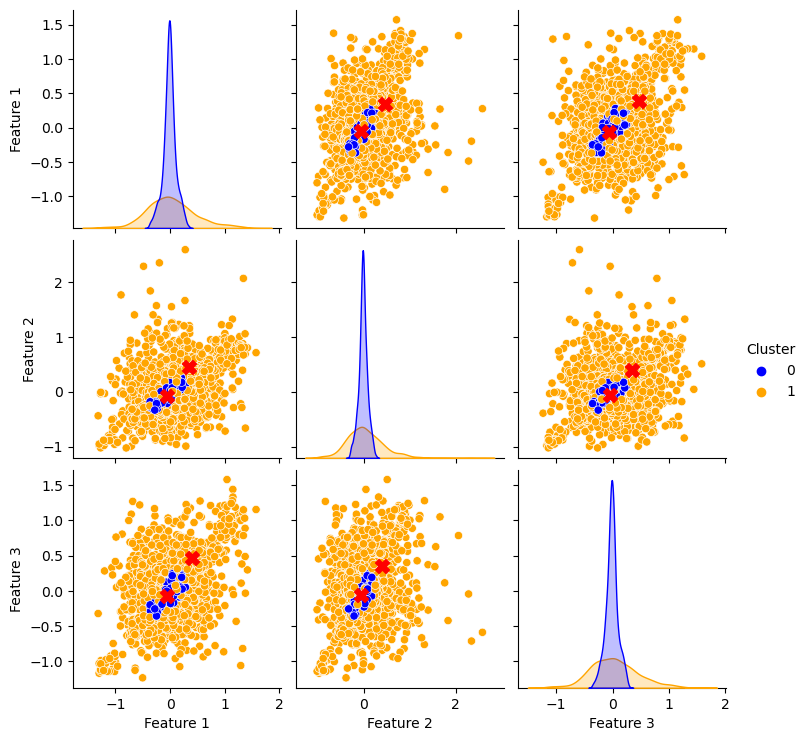

In [41]:
# %% GMM

from sklearn.mixture import GaussianMixture

# Define the number of clusters
num_clusters = 2

# Initialize KMeans model
kmeans = GaussianMixture(n_components=num_clusters, random_state=42)

# Fit the KMeans model to the data
# kmeans.fit(data_all_1_array)
kmeans.fit(X_sPCA)

labels = kmeans.predict(X_sPCA)

# labels = kmeans.labels_
n_features = kmeans.n_features_in_


# Print cluster centers and labels
print("\nLabels:\n", labels)

import matplotlib.pyplot as plt

# # Plotting cluster centers
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='x', label='Cluster Centers')

# # Plotting data points with labels
for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], cmap=colormap, label=f'Cluster {i}')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('KMeans Clustering Result - sPCA')
# # plt.legend()
# plt.show()

# __________________________________ Pairplot
# Assuming 'labels' is the array of cluster labels from kmeans.labels_
# Assuming 'X_sPCA' is the dataset you've performed PCA on

# Custom color palette
custom_palette = ['blue', 'orange']  # Add more colors if you have more than two clusters

# Create a dataframe for pair plotting
df_sPCA = pd.DataFrame(X_sPCA, columns=[f'Feature {i+1}' for i in range(X_sPCA.shape[1])])
df_sPCA['Cluster'] = labels  # Add the cluster labels as a column in the dataframe

# Create the pair plot using the custom color palette
pair_plot = sns.pairplot(df_sPCA, hue='Cluster', palette=custom_palette)

# To plot the cluster centers, we iterate over the subplots and add them to each
for i in range(pair_plot.axes.shape[0]):
    for j in range(pair_plot.axes.shape[1]):
        if i != j:
            pair_plot.axes[i, j].scatter(cluster_centers[:, i], cluster_centers[:, j], 
                                         s=100, c='red', marker='X', label='Cluster Centers' if (i == 0 and j == 1) else "")

# Adjust the legend location
# pair_plot._legend.set_bbox_to_anchor((1.05, 1))

# Show the plot
plt.show()

Accuracy: 0.5630570832543145
Silhouette Score for GMM Clustering: 0.2533589280650797
Calinski-Harabasz Index for GMM Clustering: 30.9546293244874


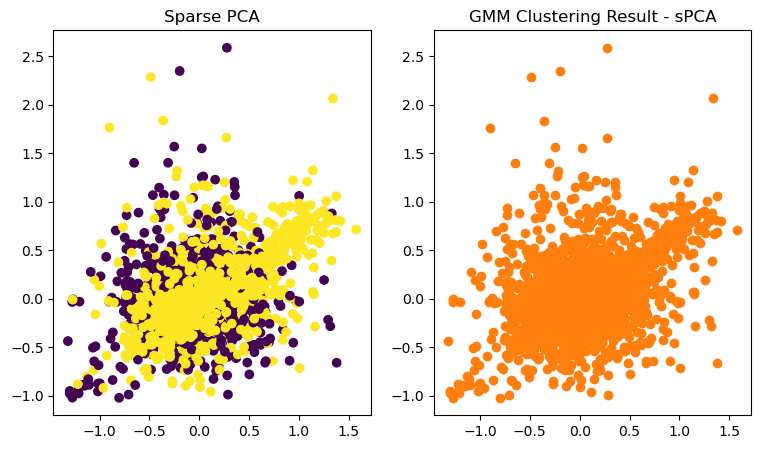

In [45]:
# ####### subplots
fig, axes = plt.subplots(1,2,figsize=(9,5))

axes[0].scatter(X_sPCA[:,0], X_sPCA[:,1],c=y)
axes[0].set_title('Sparse PCA')
# axes[0].legend() 

for i in range(num_clusters):
    cluster_points = X_sPCA[labels == i] # labels_cleaned is the correct label
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
axes[1].set_title('GMM Clustering Result - sPCA')
# axes[1].legend() 

## check whether the label matches well
# X_sPCA[:,0&1] - y vs. cluster_points[:,0&1] -  -> match it with labels_cleaned (5273,)

labels_kmeans = labels
labels_real = np.round(labels_cleaned).astype(int)
# for i in range(labels_real):
#     labels

# Comparing each label and outputting 1 if they are the same, 0 otherwise
comparison_results = [1 if kmeans_label == real_label else 0 for kmeans_label, real_label in zip(labels_kmeans, labels_real)]

# print("Comparison results:", comparison_results)
Acc = np.mean(comparison_results)
print("Accuracy:", Acc)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_sPCA, labels)
print(f"Silhouette Score for GMM Clustering: {silhouette_avg}")

from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_sPCA, labels)
print(f"Calinski-Harabasz Index for GMM Clustering: {ch_score}")